In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.cm as cm
import matplotlib as mpl

def normalize(x, mu, std):
    # return x
    return (x - mu) / std

def create_data(chemprop_model_path, target_columns, scaler_dict, uncertainty_method="evidential_total",normalize_data=True):
    gold_data_path = os.path.join(chemprop_model_path, "test_full.csv")
    pred_data_path = os.path.join(chemprop_model_path, "test_unc.csv")
    gold_data = pd.read_csv(gold_data_path)
    pred_data = pd.read_csv(pred_data_path)
    # # normalization
    if normalize_data:
        for target in target_columns:
            mean, std = scaler_dict[target]
            pred_data[target] = [normalize(t, mean, std) for t in pred_data[target]]
            gold_data[target] = [normalize(t, mean, std) for t in gold_data[target]]
            pred_data[target+"_{}_uncal_var".format(uncertainty_method)] = [t/(std**2) for t in pred_data[target+"_{}_uncal_var".format(uncertainty_method)]]

    rename_dict = {target: target+" prediction" for target in target_columns}
    pred_data = pred_data.rename(columns=rename_dict).drop(["smiles"],axis=1)
    return pd.concat([gold_data, pred_data], axis = 1)

def create_plot(data, target_columns, dataset):
    save_dir = "docs/plot_parity/{}".format(dataset)
    os.makedirs(save_dir, exist_ok=True)
    for target in target_columns:
        min_point = min(min(data[target]), min(data[target+" prediction"]))
        max_point = max(max(data[target]), max(data[target+" prediction"]))
        points = np.linspace(min_point,max_point,20)
        rmse = np.sqrt(mean_squared_error(data[target], data[target+" prediction"]))
        mae = mean_absolute_error(data[target], data[target+" prediction"])
        r2 = r2_score(data[target], data[target+" prediction"])
        print("RMSE, MAE, R2 score")
        print("{:.3f}, {:.3f}, {:.3f}".format(rmse, mae, r2))
        plt.figure(figsize=(4.5,4.5), dpi=100)
        plt.plot(points, points, color='black', linestyle='--')
        # plt.scatter(x=data[target], y=data[target+" prediction"])
        sns.scatterplot(data=data, x=target, y=target+" prediction")
        plt.xlabel("normalized "+target+" (-)", fontsize=14)
        plt.ylabel(target+" prediction"+" (-)", fontsize=14)
        plt.text(0.1, 0.9, r'$R^2$ = ' + f'{r2:.3f}', transform=plt.gca().transAxes, fontsize=13)
        plt.savefig(os.path.join(save_dir, "{}.svg".format(target)), format="svg", bbox_inches='tight')

def truncate_unc(data, target_columns, trunc_values,uncertainty_method="evidential_total"):
    data_copy = data.copy()
    for target, trunc_value in zip(target_columns, trunc_values):
        var_name = target + "_{}_uncal_var".format(uncertainty_method)
        new_values = [trunc_value if v > trunc_value else v for v in data[var_name]]
        data_copy[var_name] = new_values
    return data_copy


def create_unc_plot(data, target_columns, dataset, uncertainty_method="evidential_total"):
    cmap = cm.viridis
    save_dir = "figures/plot_parity_unc/{}".format(dataset)
    os.makedirs(save_dir, exist_ok=True)
    
    for j, target in enumerate(target_columns):
        var_name = target + "_{}_uncal_var".format(uncertainty_method)

        min_point = min(min(data[target]), min(data[target+" prediction"]))
        max_point = max(max(data[target]), max(data[target+" prediction"]))
        points = np.linspace(min_point,max_point,20)
        rmse = np.sqrt(mean_squared_error(data[target], data[target+" prediction"]))
        mae = mean_absolute_error(data[target], data[target+" prediction"])
        r2 = r2_score(data[target], data[target+" prediction"])
        print("RMSE, MAE, R2 score")
        print("{:.3f}, {:.3f}, {:.3f}".format(rmse, mae, r2))

        fig = plt.figure(figsize=(4.5,4.5), dpi=80)
        plt.plot(points, points, color='black', linestyle='--')
        # plt.scatter(x=data[target], y=data[target+" prediction"])
        sns.scatterplot(data=data,#.sort_values(by = var_name, axis = 0,ascending=True),
                         x=target, y=target+" prediction", hue=var_name, palette=cmap, legend=False,
                         s=10, alpha=0.65)
        # plt.scatter(data[target], data[target+" prediction"], alpha=0.15, c="black", s=7)
        plt.xlabel("Normalized "+target+" (-)", fontsize=14)
        plt.ylabel("Normalized "+target+" prediction"+" (-)", fontsize=14)
        plt.text(0.1, 0.9, r'$R^2$ = ' + f'{r2:.3f}', transform=plt.gca().transAxes, fontsize=13)

        if j == len(target_columns)-1:
            norm = mpl.colors.Normalize(vmin=min(data[var_name]), vmax=max(data[var_name]))
            cax = fig.add_axes([0.91, 0.107, 0.065, 0.77])
            cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax, orientation='vertical',
                                label='Normalized model uncertainty variance')
            cbar.set_label(label='Normalized model uncertainty variance',size=13)
        plt.savefig(os.path.join(save_dir, "{}.svg".format(target)), format="svg", bbox_inches='tight')
        # break
# plt.show()
def create_unc_plot_2(data, target_columns, dataset, uncertainty_method="evidential_total"):
    cmap = cm.viridis
    save_dir = "figures/plot_parity_unc_2/{}".format(dataset)
    os.makedirs(save_dir, exist_ok=True)
    
    for j, target in enumerate(target_columns):
        var_name = target + "_{}_uncal_var".format(uncertainty_method)

        min_point = min(min(data[target]), min(data[target+" prediction"]))
        max_point = max(max(data[target]), max(data[target+" prediction"]))
        points = np.linspace(min_point,max_point,20)
        rmse = np.sqrt(mean_squared_error(data[target], data[target+" prediction"]))
        mae = mean_absolute_error(data[target], data[target+" prediction"])
        r2 = r2_score(data[target], data[target+" prediction"])
        print("RMSE, MAE, R2 score")
        print("{:.3f}, {:.3f}, {:.3f}".format(rmse, mae, r2))

        fig = plt.figure(figsize=(4.5,4.5), dpi=80)
        plt.plot(points, points, color='black', linestyle='--')
        # plt.scatter(x=data[target], y=data[target+" prediction"])
        sns.scatterplot(data=data,#.sort_values(by = var_name, axis = 0,ascending=True),
                         x=target, y=target+" prediction", hue=var_name, palette=cmap, legend=False,
                         s=10, alpha=0.65)
        plt.xlabel(target+" (-)", fontsize=14)
        plt.ylabel(target+" prediction"+" (-)", fontsize=14)
        plt.text(0.1, 0.9, r'$R^2$ = ' + f'{r2:.3f}', transform=plt.gca().transAxes, fontsize=13)

        # if j == len(target_columns)-1:
        norm = mpl.colors.Normalize(vmin=min(data[var_name]), vmax=max(data[var_name]))
        cax = fig.add_axes([0.91, 0.107, 0.065, 0.77])
        cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax, orientation='vertical',
                                label='Model uncertainty variance')
        cbar.set_label(label='Model uncertainty variance',size=13)
        # plt.savefig(os.path.join(save_dir, "{}.svg".format(target)), format="svg", bbox_inches='tight')

def create_single_unc_plot(data, target, uncertainty_method="evidential_total", xlabel=False, ylabel=False, color_bar=True, save_path=None):
    cmap = cm.viridis
    target_name_dict = {"1syh score":"1SYH score", "4lde score":"4LDE score", "6y2f score":"6Y2F score",
                    "singlet-triplet value":"Singlet-triplet gap", "oscillator strength":"Oscillator strength", 
                    "abs_diff_vee":"Abs. diff. of VEE",
                    "activation_energy":"Activation energy", "reaction_energy":"Reaction energy"}
    var_name = target + "_{}_uncal_var".format(uncertainty_method)
    min_point = min(min(data[target]), min(data[target+" prediction"]))
    max_point = max(max(data[target]), max(data[target+" prediction"]))
    points = np.linspace(min_point,max_point,20)

    r2 = r2_score(data[target], data[target+" prediction"])
    fig = plt.figure(figsize=(4.5,4.5), dpi=200)
    plt.plot(points, points, color='gray', linestyle='--')
    
    sns.scatterplot(data=data.sort_values(by = var_name, axis = 0,ascending=False),
                        x=target, y=target+" prediction", hue=var_name, palette=cmap, legend=False,
                        s=10, alpha=0.65)
    # plt.scatter(data[target], data[target+" prediction"], alpha=0.15, c="black", s=7)
    if xlabel:
        plt.xlabel("Reference value", fontsize=18)
    else:
        plt.xlabel("")
    if ylabel:
        plt.ylabel("Prediction", fontsize=18)
    else:
        plt.ylabel("")
    plt.title(target_name_dict[target], fontsize=18)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.text(0.1, 0.9, r'$R^2$ = ' + f'{r2:.3f}', transform=plt.gca().transAxes, fontsize=18)

    if color_bar:
        norm = mpl.colors.Normalize(vmin=min(data[var_name]), vmax=max(data[var_name]))
        cax = fig.add_axes([0.91, 0.107, 0.065, 0.77])
        cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax, orientation='vertical',)
                               # label='Model uncertainty variance')
        cbar.ax.tick_params(labelsize=14)
        # cbar.set_label(label='Model uncertainty variance',size=13)
    # plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')

def replace_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[df[column_name] < lower_bound, column_name] = lower_bound
    df.loc[df[column_name] > upper_bound, column_name] = upper_bound
    return df

In [13]:
max(data["6y2f score_evidential_total_uncal_var"])

141.76338963555125

## Plot docking scores (protein ligands design task)

RMSE, MAE, R2 score
3.937, 1.073, 0.795
RMSE, MAE, R2 score
0.714, 0.348, 0.796


/home/lungyi/anaconda3/envs/uncmoo2/lib/python3.8/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/home/lungyi/anaconda3/envs/uncmoo2/lib/python3.8/site-packages/matplotlib/colors.py:1355: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


RMSE, MAE, R2 score
0.217, 0.159, 0.952


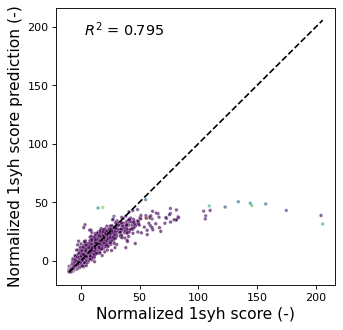

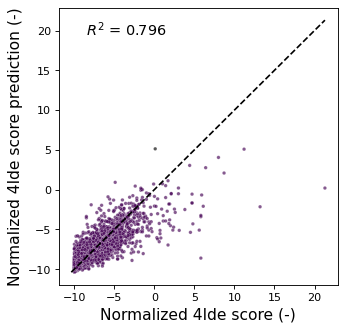

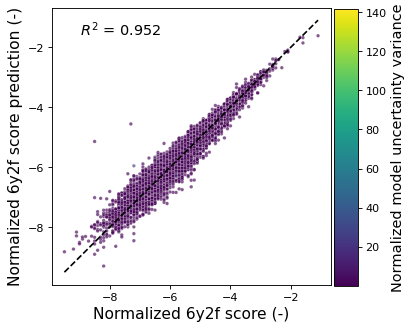

In [5]:
scaler_dict = {"1syh score": (-2.832, 8.928), "4lde score": (-7.547, 1.617), "6y2f score": (-5.528, 0.997)}
target_columns = ["1syh score", "4lde score", "6y2f score"]
model_path = "chemprop_unc/save_models/docking/evidential/fold_0"
dataset = "docking"

data = create_data(model_path, target_columns, scaler_dict, normalize_data=False)
create_unc_plot(data, target_columns, dataset)

RMSE, MAE, R2 score
0.441, 0.120, 0.795
RMSE, MAE, R2 score
0.441, 0.215, 0.796
RMSE, MAE, R2 score
0.218, 0.160, 0.952


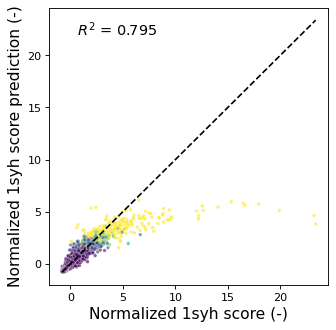

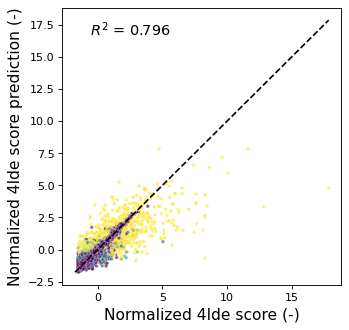

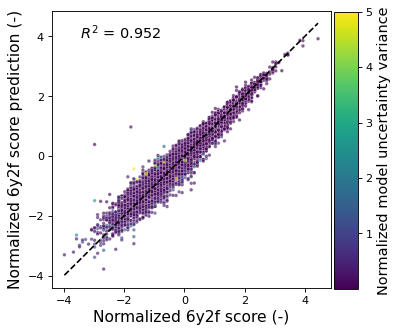

In [4]:
scaler_dict = {"1syh score": (-2.832, 8.928), "4lde score": (-7.547, 1.617), "6y2f score": (-5.528, 0.997)}
target_columns = ["1syh score", "4lde score", "6y2f score"]
model_path = "chemprop_unc/save_models/docking/evidential/fold_0"
dataset = "docking"
trunc_values = (5, 5, 5)

data = create_data(model_path, target_columns, scaler_dict)
data_new = truncate_unc(data, target_columns, trunc_values)
create_unc_plot(data_new, target_columns, dataset)



## Organic Emitters

In [1]:
scaler_dict = {"singlet-triplet value": (1.003, 0.396), "oscillator strength": (0.086, 0.149), "abs_diff_vee": (2.688, 1.038)}
target_columns = ["singlet-triplet value", "oscillator strength", "abs_diff_vee"]
model_path = "chemprop_unc/save_models/organic_emitter/ensemble_mve/fold_0"
dataset = "organic_emitter"

data = create_data(model_path, target_columns, scaler_dict, uncertainty_method="mve", normalize_data=False)
create_unc_plot(data, target_columns, dataset, uncertainty_method="mve")


NameError: name 'create_data' is not defined

RMSE, MAE, R2 score
0.117, 0.075, 0.912
RMSE, MAE, R2 score
0.068, 0.031, 0.784
RMSE, MAE, R2 score
0.316, 0.200, 0.907


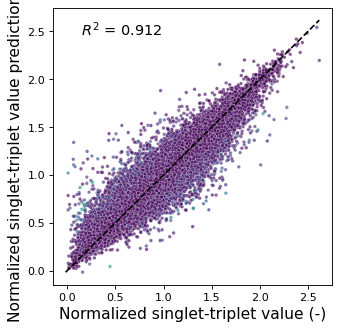

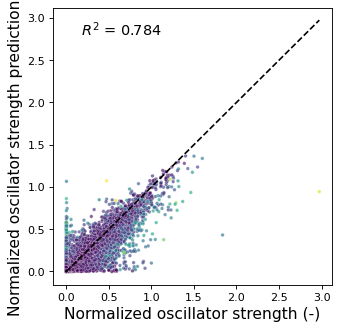

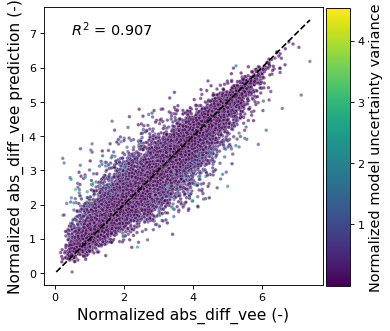

In [6]:
trunc_values = (5, 5, 5)
data_new = truncate_unc(data, target_columns, trunc_values,uncertainty_method="mve")
create_unc_plot(data_new, target_columns, dataset, uncertainty_method="mve")

## Reactivity

RMSE, MAE, R2 score
0.473, 0.350, 0.772
RMSE, MAE, R2 score
0.226, 0.145, 0.947


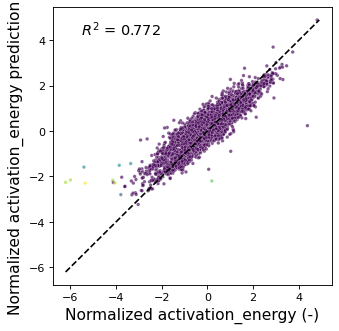

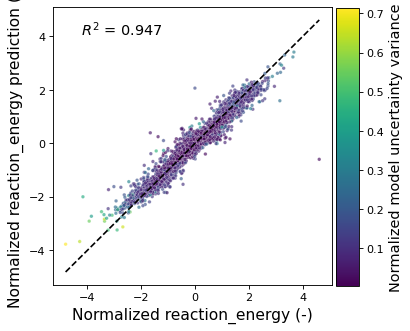

In [7]:
scaler_dict = {"activation_energy": (84.104, 3.076), "reaction_energy": (-0.749, 4.507)}
target_columns = ["activation_energy", "reaction_energy"]
model_path = "chemprop_unc/save_models/reactivity/evidential_final/fold_0"
dataset = "reactivity"

data = create_data(model_path, target_columns, scaler_dict, uncertainty_method="evidential_total")
trunc_values = (5, 5, 5)
create_unc_plot(data, target_columns, dataset, uncertainty_method="evidential_total")


## Plot all parity plots in 4 x 2 subplot

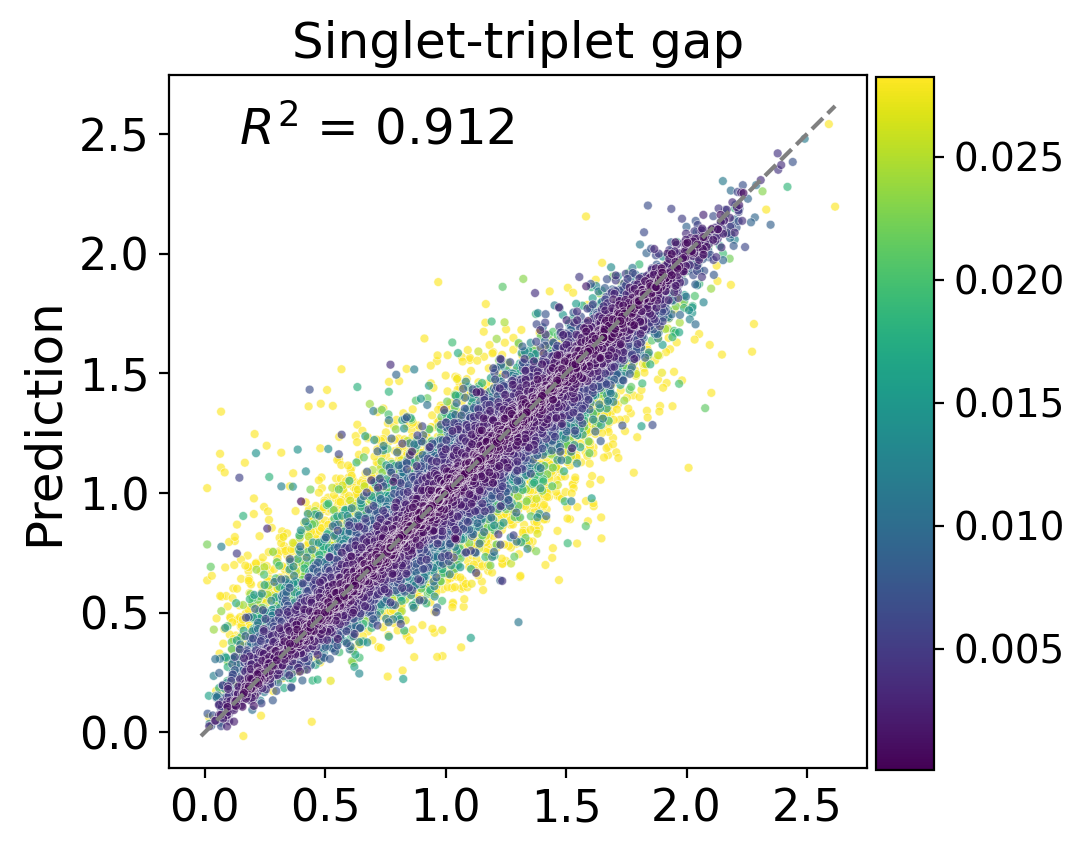

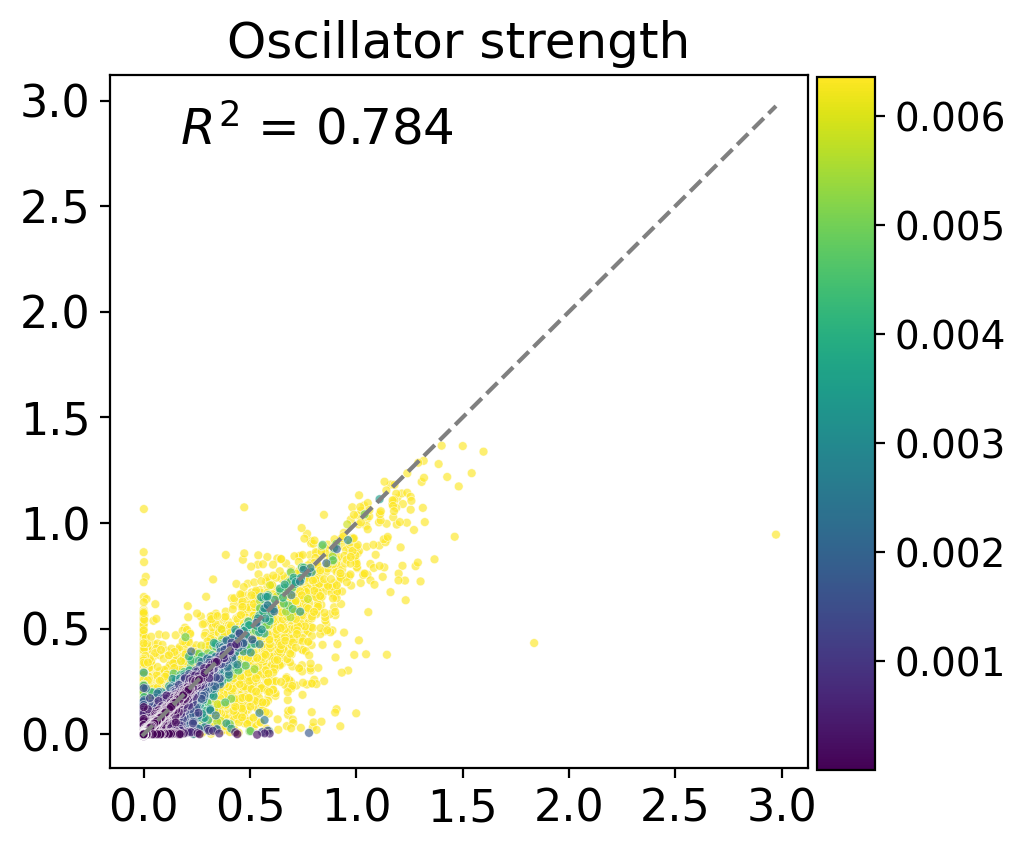

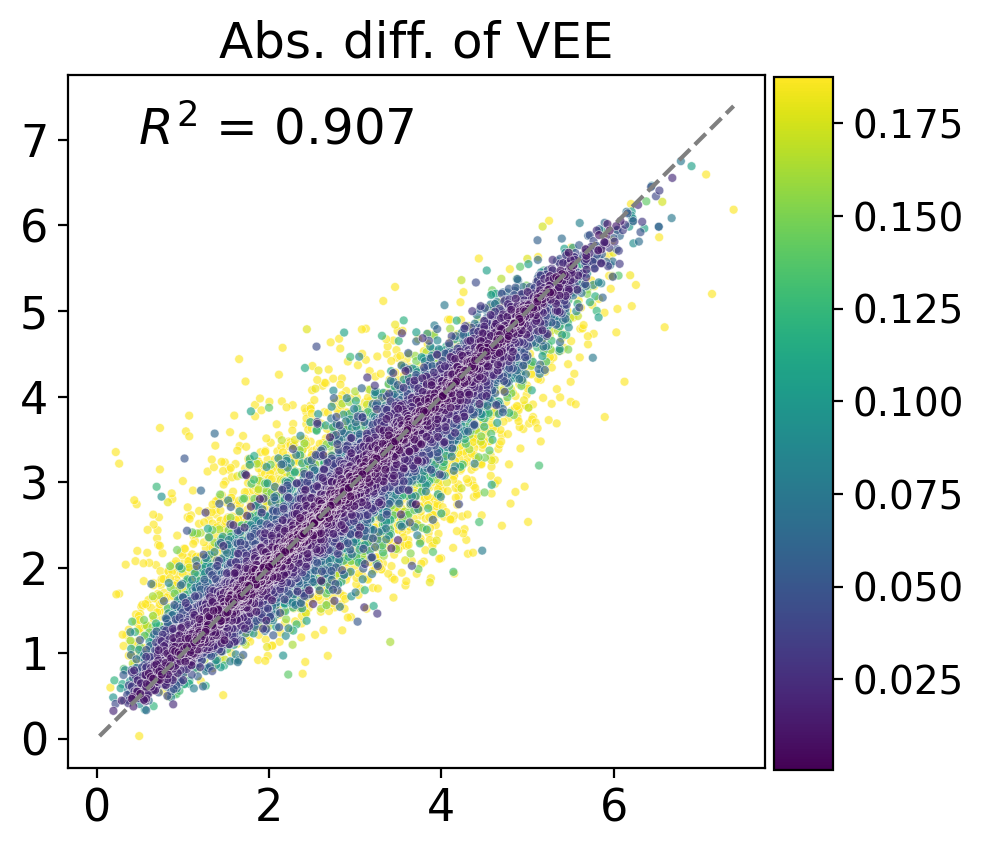

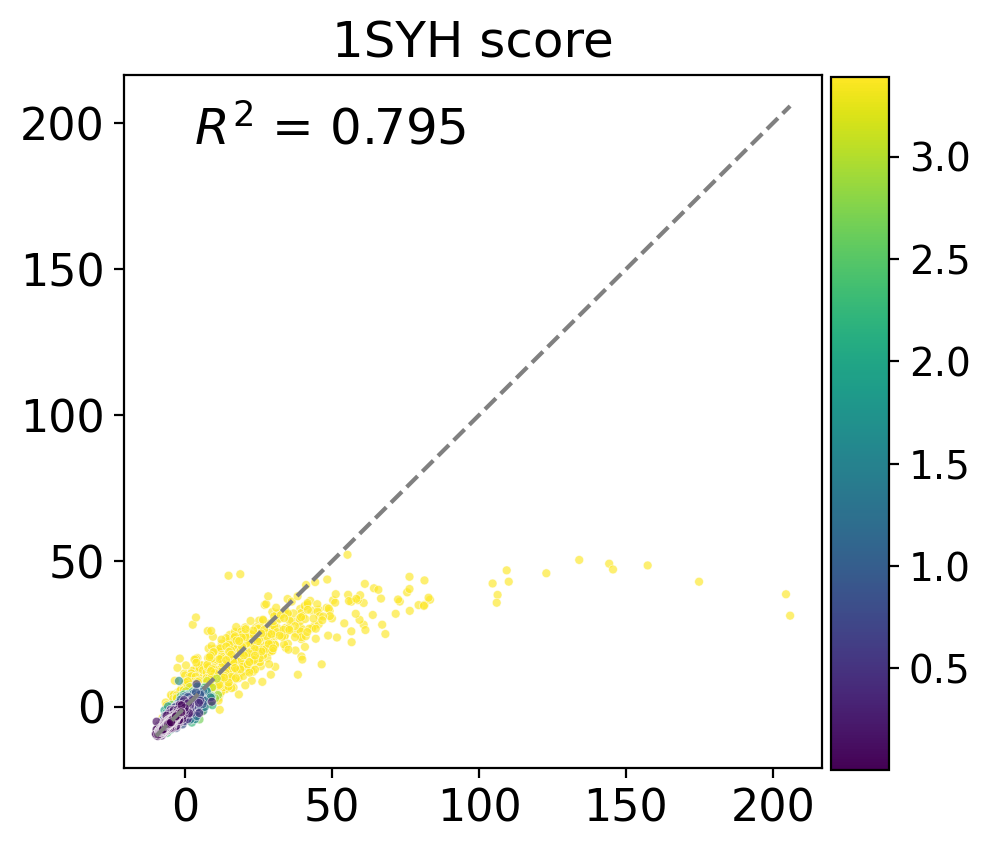

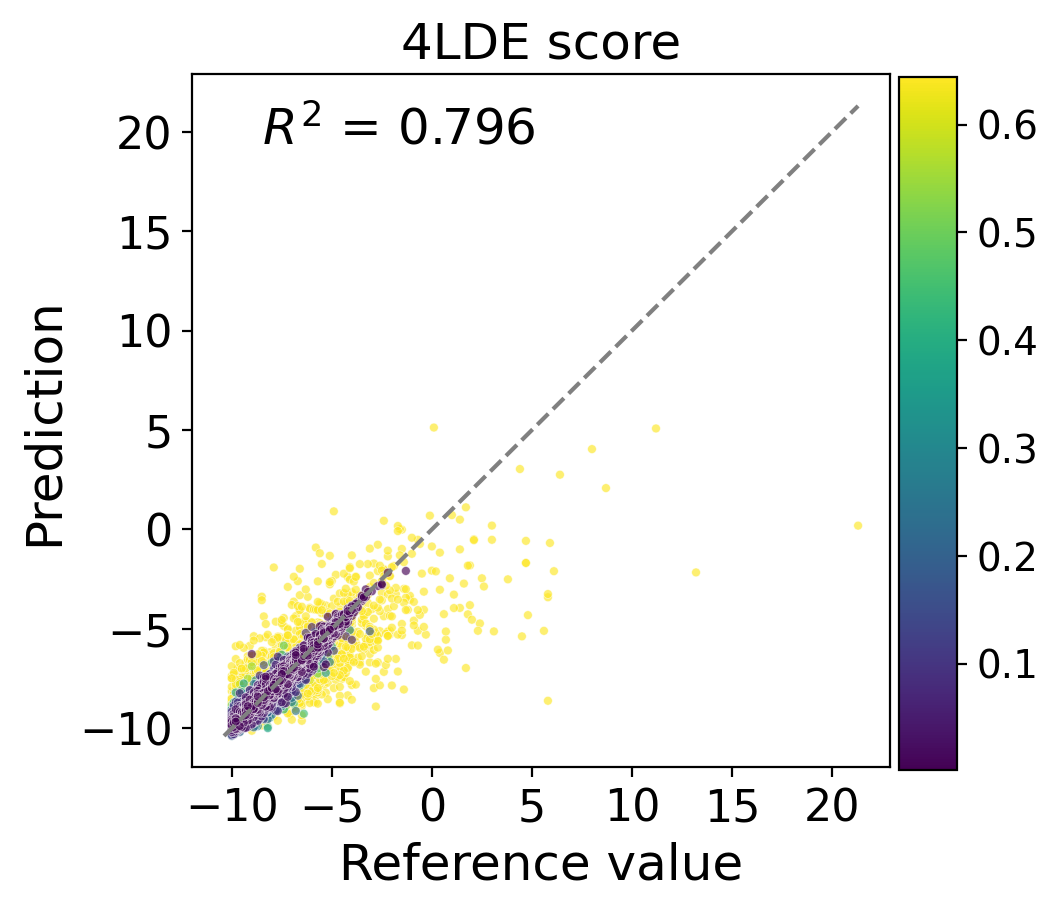

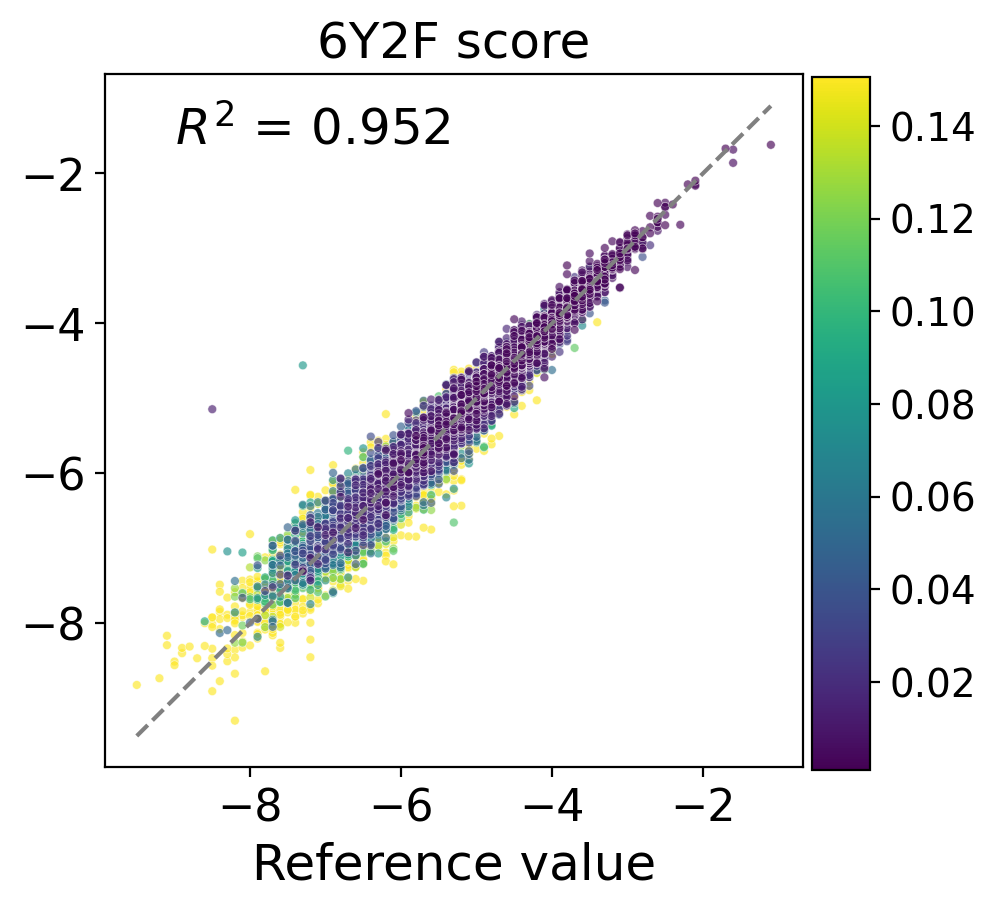

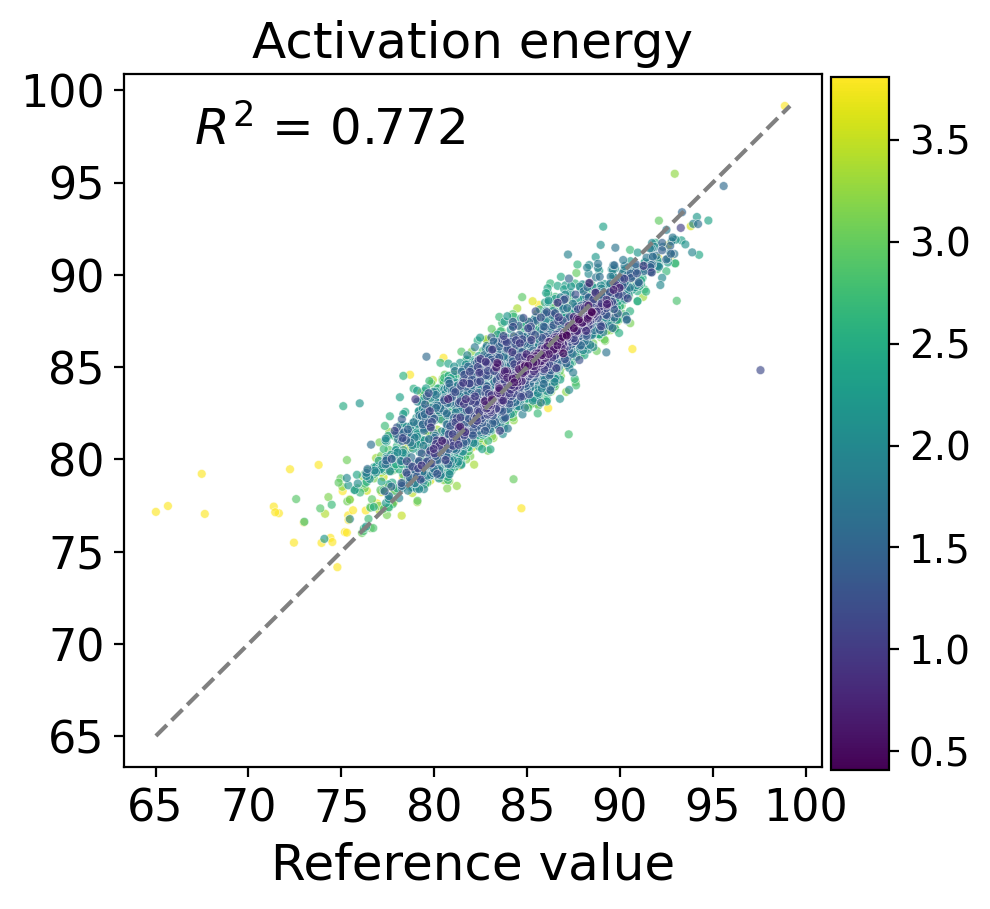

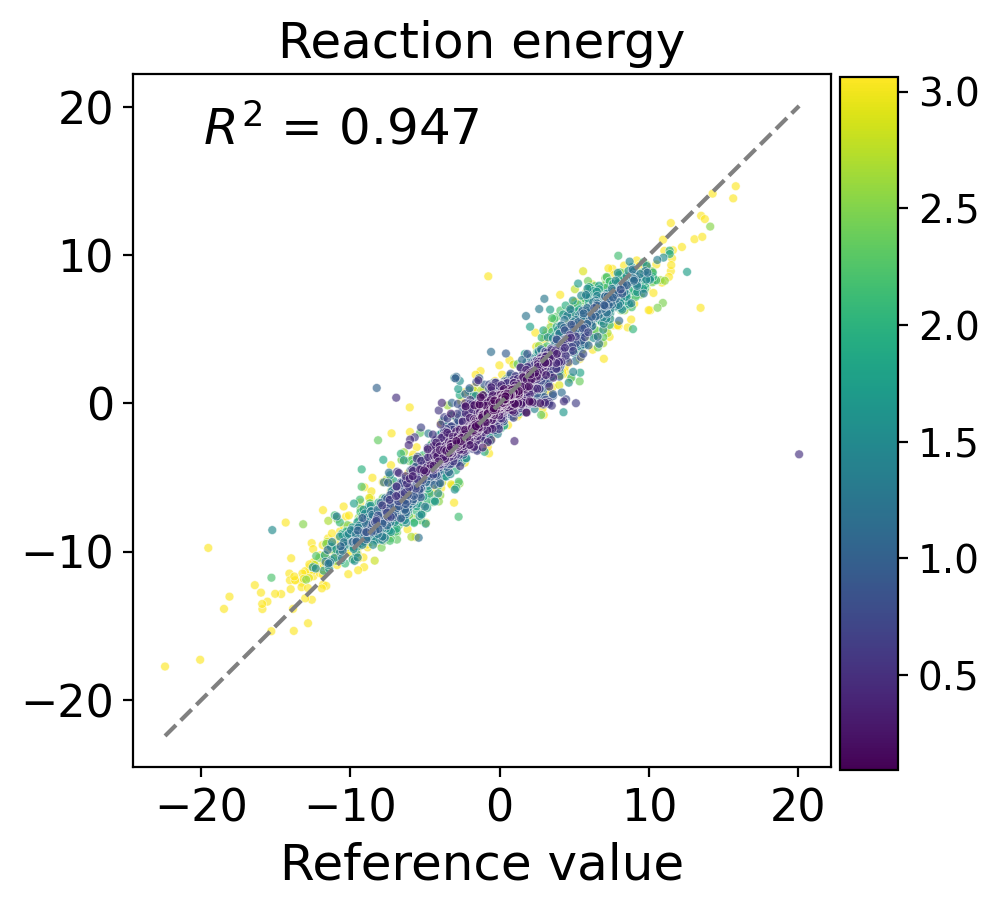

In [3]:
dataset_target = [("organic_emitter", "singlet-triplet value"), ("organic_emitter", "oscillator strength"), ("organic_emitter", "abs_diff_vee"),
                  ("docking", "1syh score"), ("docking", "4lde score"), ("docking", "6y2f score"),
                  ("reactivity", "activation_energy"), ("reactivity", "reaction_energy")]
scaler_dict = {"1syh score": (-2.832, 8.928), "4lde score": (-7.547, 1.617), "6y2f score": (-5.528, 0.997),
               "singlet-triplet value": (1.003, 0.396), "oscillator strength": (0.086, 0.149), "abs_diff_vee": (2.688, 1.038),
               "activation_energy": (84.104, 3.076), "reaction_energy": (-0.749, 4.507)}
model_dict = {"docking":"chemprop_unc/save_models/docking/evidential/fold_0",
              "organic_emitter":"chemprop_unc/save_models/organic_emitter/ensemble_mve/fold_0",
              "reactivity":"chemprop_unc/save_models/reactivity/evidential_final/fold_0"}
uncertainty_method_dict = {"docking": "evidential_total",
                           "organic_emitter": "mve",
                           "reactivity": "evidential_total"}

# fig = plt.figure(figsize=(14,7), dpi=150)
for i, (dataset, target) in enumerate(dataset_target):
    xlabel = False
    ylabel = False

    j = i + 1
    x = i//4 + 1
    y = j%4
    if y == 0: 
        y = 4
    if x == 2:
        xlabel = True
    if y == 1:
        ylabel = True
    # plt.subplot(int(str(2) + str(4) + str(j )))
    model_path = model_dict[dataset]
    uncertainty_method = uncertainty_method_dict[dataset]
    data = create_data(model_path, [target], scaler_dict, normalize_data=False, uncertainty_method=uncertainty_method)
    data = replace_outliers(data, target+f"_{uncertainty_method}_uncal_var") # activation_energy_evidential_total_uncal_var
    create_single_unc_plot(data, target, uncertainty_method=uncertainty_method, xlabel=xlabel, ylabel=ylabel, color_bar=True, save_path=f"figures/plot_parity_unc/{j}_{target}.png")
    
# else:
#     plt.tight_layout()
#     plt.savefig("figures/plot_parity_unc/overall_parity.png")


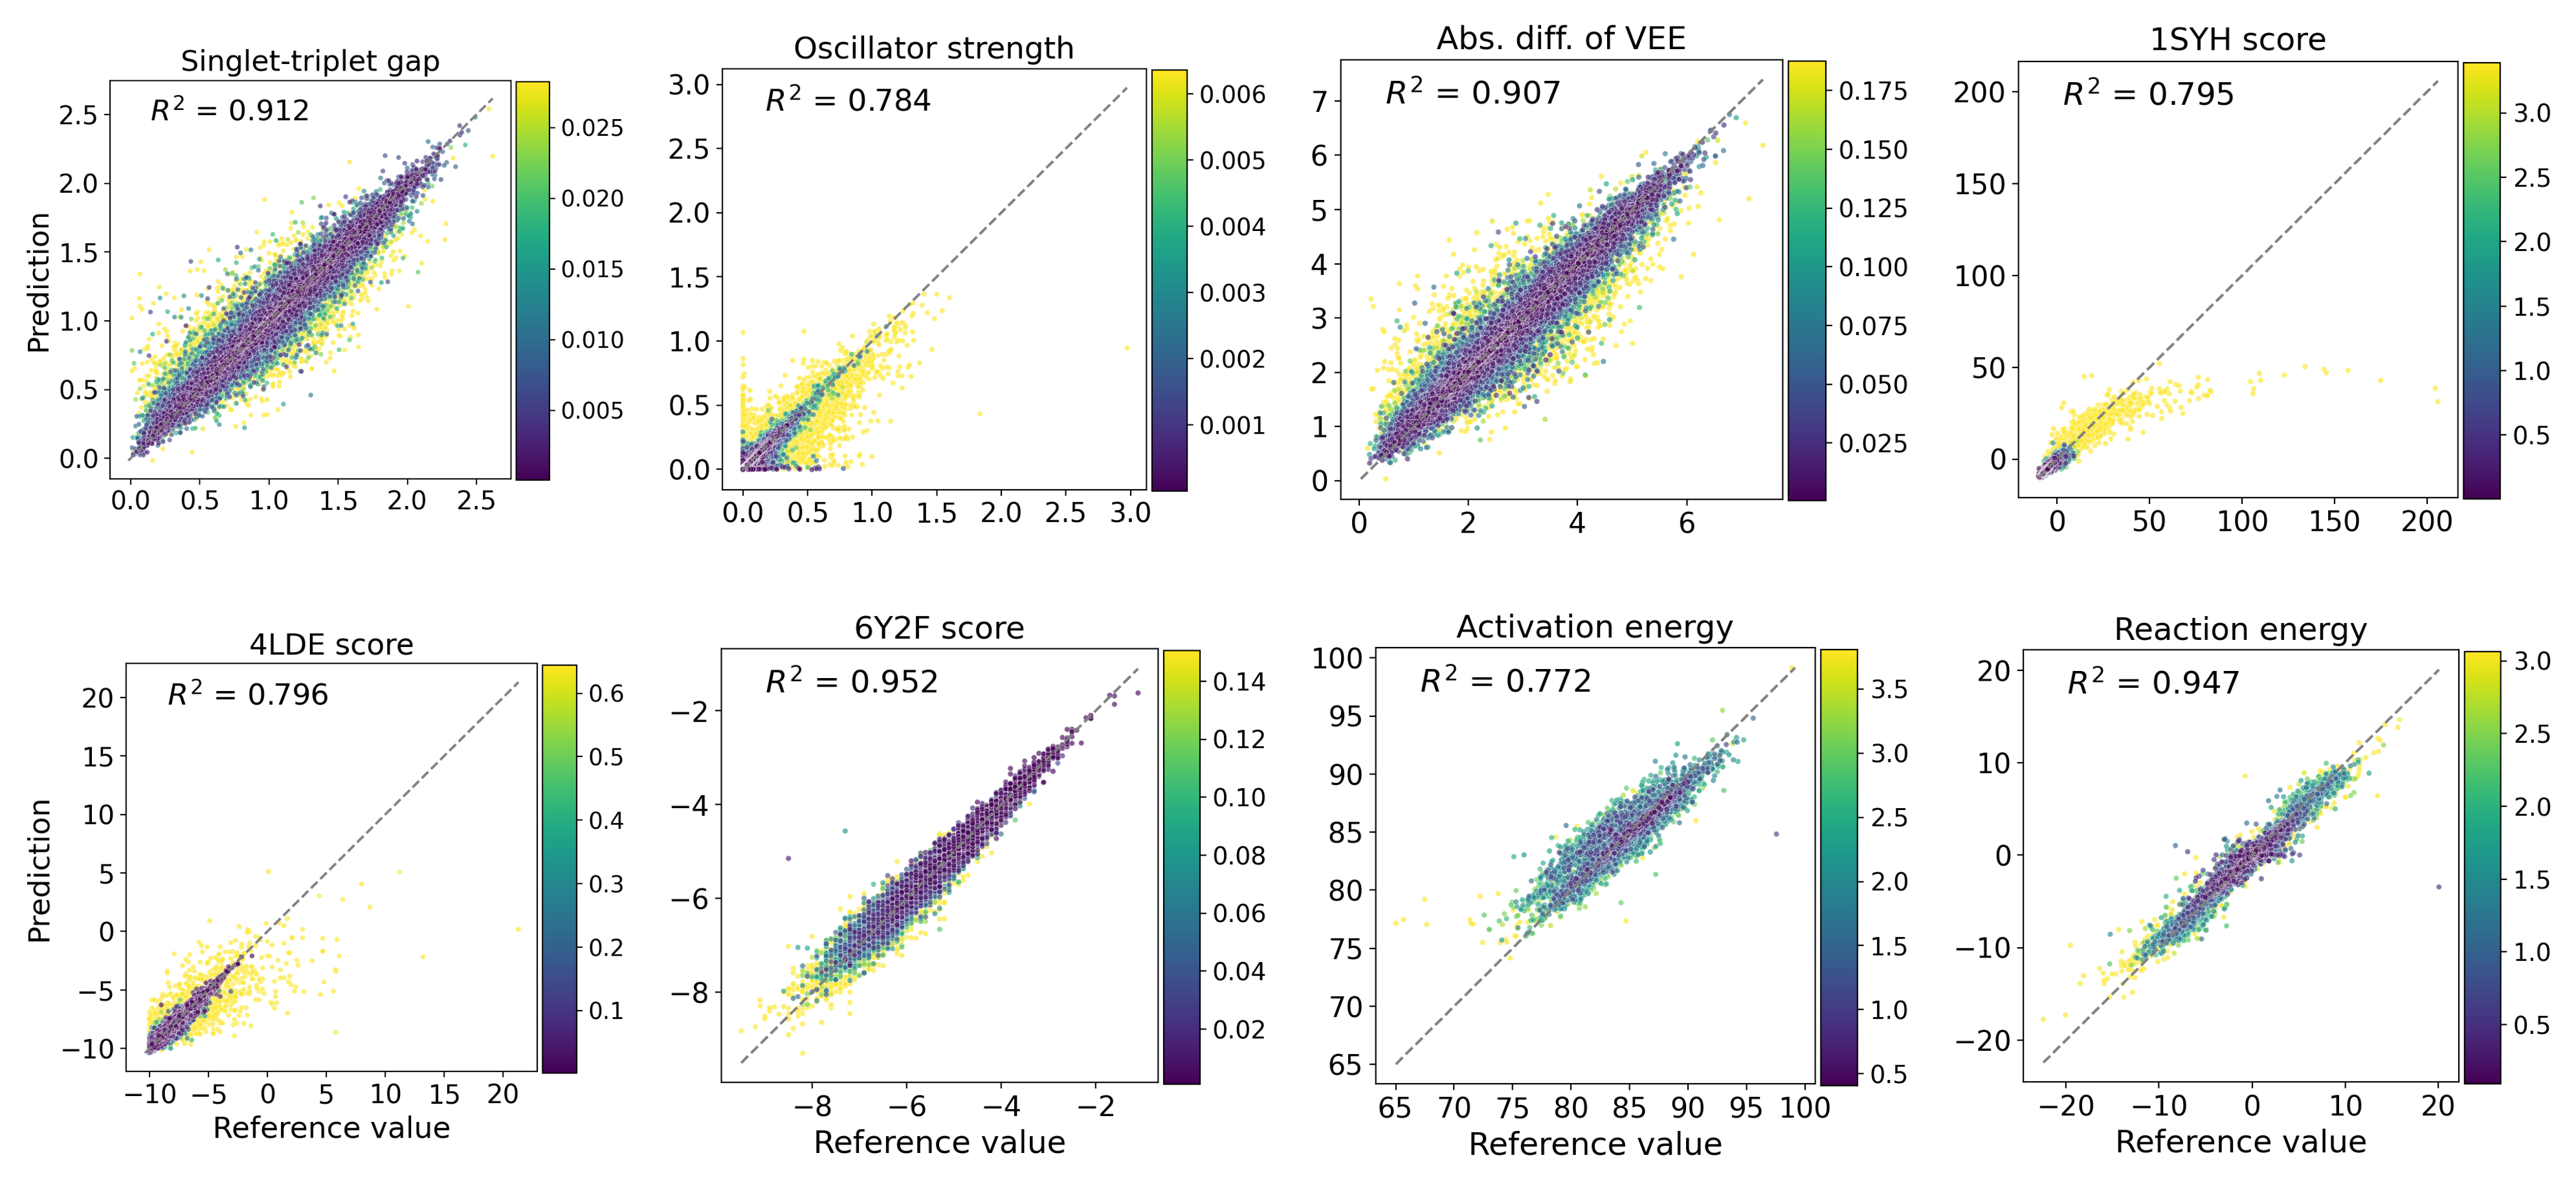

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import os

image_files = ["singlet-triplet value", "oscillator strength", "abs_diff_vee",
                "1syh score", "4lde score", "6y2f score",
                "activation_energy", "reaction_energy"]
image_files = [f"figures/plot_parity_unc/{i+1}_{file_name}.png" for i, file_name in enumerate(image_files)]

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

fig, axs = plt.subplots(2, 4, figsize=(20, 10), dpi=200) 

for i, ax in enumerate(axs.flat):
    image_path = image_files[i]
    if os.path.exists(image_path):
        img = Image.open(image_path)
    else:
        continue 

    ax.imshow(img)
    ax.axis('off')
    # ax.text(0, 0, labels[i], color='black', fontsize=24, va='top', ha='left', weight="bold")

plt.tight_layout()
plt.savefig('figures/plot_parity_unc/combined_plarity_image.png')
plt.show()


## Plot cutoff-based scalarization

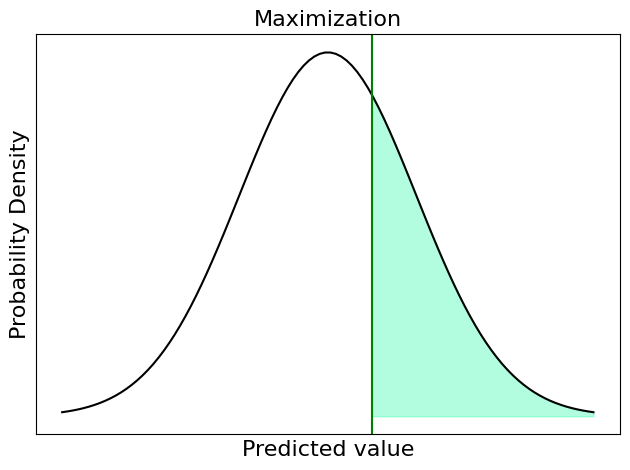

0.3085375387259869


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_gaussian_distribution(mean, std, cutoff=None, greater_than=True, title=None, save_path=None):
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    y = (1/(std * np.sqrt(2*np.pi))) * np.exp(-0.5*((x-mean)/std)**2)

    plt.plot(x, y, color ="black")

    if cutoff is not None:
        plt.axvline(cutoff, color='green')  

        if greater_than:
            fill_x = np.linspace(cutoff, mean + 3*std, 100)
            fill_y = (1/(std * np.sqrt(2*np.pi))) * np.exp(-0.5*((fill_x-mean)/std)**2)
            plt.fill_between(fill_x, fill_y, color='mediumspringgreen', alpha=0.3)
        else:
            fill_x = np.linspace(mean - 3*std, cutoff, 100)
            fill_y = (1/(std * np.sqrt(2*np.pi))) * np.exp(-0.5*((fill_x-mean)/std)**2)
            plt.fill_between(fill_x, fill_y, color='mediumspringgreen', alpha=0.3)

    plt.title(title,fontsize=16)
    plt.xlabel('Predicted value', fontsize=16)
    plt.ylabel('Probability Density', fontsize=16)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, format="svg")
    plt.show()


def calculate_greater_cdf(cutoff, mean, std):
    '''
    Calculate the cumulative distribution greater than a certain cutoff,
    that is, the probability greater than a certain cutoff
    '''
    return 1 - norm.cdf(cutoff, loc=mean, scale=std)

def calculate_less_cdf(cutoff, mean, std): 
    '''
    Calculate the cumulative distribution smaller than a certain cutoff, that is, 
    the probability of being smaller than a certain cutoff
    '''
    return norm.cdf(cutoff, loc=mean, scale=std)

# test the code
mean = -2.5   
std = 1.
cutoff = -2 
greater_than = True
title = "Maximization"

plot_gaussian_distribution(mean, std, cutoff, greater_than=greater_than, title=title, save_path="figures/plot_probability/maxi.svg")
if greater_than:
    print(calculate_greater_cdf(cutoff, mean, std))
else:
    print(calculate_less_cdf(cutoff, mean, std))

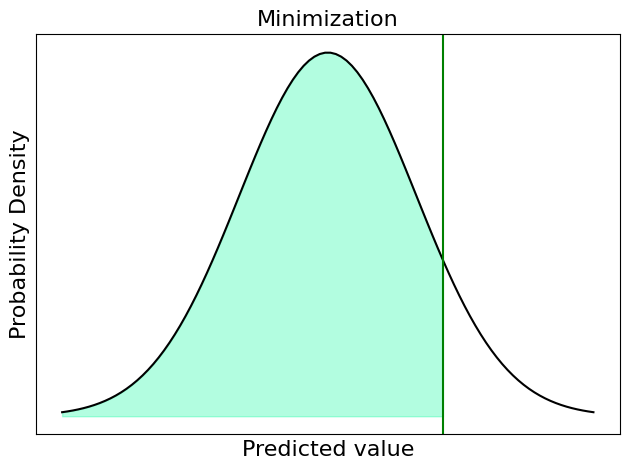

0.9031995154143897


In [19]:
mean = -11.3
std = 1
cutoff = -10
greater_than = False
title = "Minimization"

plot_gaussian_distribution(mean, std, cutoff, greater_than=greater_than, title=title, save_path="figures/plot_probability/mini.svg")
if greater_than:
    print(calculate_greater_cdf(cutoff, mean, std))
else:
    print(calculate_less_cdf(cutoff, mean, std))

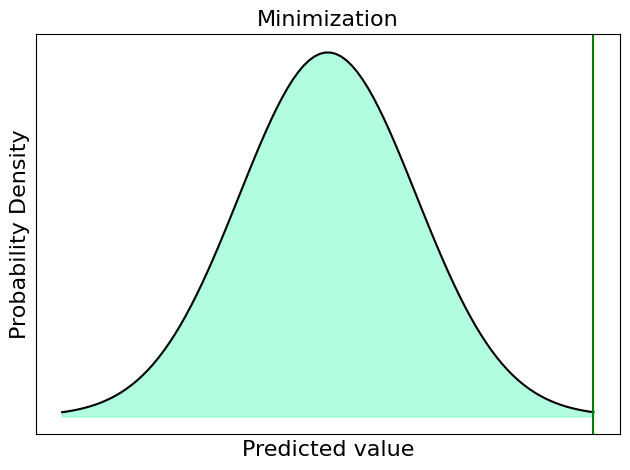

0.9986501019683699


In [24]:
mean = 0
std = 1
cutoff = 3
greater_than = False
title = "Minimization"

plot_gaussian_distribution(mean, std, cutoff, greater_than=greater_than, title=title, save_path="figures/plot_probability/mini_2.svg")
if greater_than:
    print(calculate_greater_cdf(cutoff, mean, std))
else:
    print(calculate_less_cdf(cutoff, mean, std))